# Taller modelos de aprendizaje

Partiendo de los problemas del taller modelos de SVM, se va a implementar un modelo de aprendizaje de maquina que considere los espacios de hipótesis revisados en clase. El modelo debe garantizar:

1. Generalización por medio de una estrategia de adecuada de validación cruzada.
2. Ajuste de hiperparametros (con una selección adecuada de hiperparametros para cada modelo)

Para el problema de clasificación de billetes se va a usar como medida de rendimiento el accuracy, mientras que para el problema de clasificación de ocupación de una oficina se va a usar la sensibiliad como medida de rendimiento. Esto en parte por el desbalance de clases en este segundo problema.

Para los dos problemas se va a usar un modelo perceptron, esto debido a la naturaleza del problema y además que su dimensión VC es $d+1$ donde $d$ es la dimensión del espacio de características, lo que teóricamente acota la probabilad de aprendizaje o generalización.


---

In [7]:
#Import neccesary libraries to run the code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

### Clasificación de billetes

Debido a que para el primer problema se poseen pocos datos, se va a manejar una estrategia de validación cruzada para poder generalizar, en específico se va a usar k-folds. Adicional a esto para este problema se va a ajustar el parametro para el numero de folds que se van a usar.

In [9]:
#import the data
columns_dataset=["Variance W.T","Skewness W.T","Curtosis of W.T","Entropy Image","Class"]
df=pd.read_csv('data/bank_note/data_banknote_authentication.txt',names=columns_dataset)

#Set of features vectors
X=df[["Variance W.T","Skewness W.T","Curtosis of W.T","Entropy Image"]]
#Labels
y=df["Class"]

In [30]:
def run_model_1(n_folds):
    # Create a Perceptron classifier
    perceptron = Perceptron()

    # Create a StratifiedKFold object
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Define the sensitivity (recall) score as a custom scorer
    sensitivity_scorer = make_scorer(recall_score, pos_label=1)

    # Perform cross-validation
    scores = cross_val_score(perceptron, X, y,cv=kf)

    # Print the accuracy scores for each fold
    print(f'Performance with #folds = {n_folds} ---------------------')
    #for i, score in enumerate(scores):
    #    print(f"Fold {i+1} accuracy: {score}")

    # Print the mean accuracy across all folds
    print(f"Mean accuracy: {np.mean(scores)}")
    return np.mean(scores)

Performance with #folds = 3 ---------------------
Mean accuracy: 0.9861510579406865
Performance with #folds = 4 ---------------------
Mean accuracy: 0.9861516034985424
Performance with #folds = 5 ---------------------
Mean accuracy: 0.9745109489051096
Performance with #folds = 6 ---------------------
Mean accuracy: 0.9795928139125105
Performance with #folds = 7 ---------------------
Mean accuracy: 0.9861516034985423
Performance with #folds = 8 ---------------------
Mean accuracy: 0.9839606283149734
Performance with #folds = 9 ---------------------
Mean accuracy: 0.9832492451171502
Performance with #folds = 10 ---------------------
Mean accuracy: 0.9832222574843964
Performance with #folds = 11 ---------------------
Mean accuracy: 0.9832492668621701
Performance with #folds = 12 ---------------------
Mean accuracy: 0.9847190439867785
Performance with #folds = 13 ---------------------
Mean accuracy: 0.9832469417375077
Performance with #folds = 14 ---------------------
Mean accuracy: 0.9795

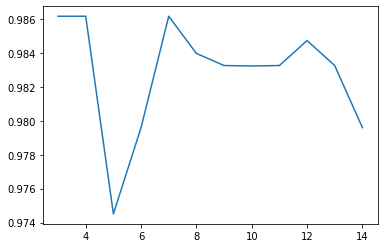

In [31]:
#number of max iterations options
iteration_options=list(range(3,15))
mean_accuracy_results=[]

for i in iteration_options:
    mean_accuracy_results.append(run_model_1(i))
    
plt.plot(iteration_options,mean_accuracy_results)

en este caso se observa que se obtienen los mejores resultados cuando se realiza un 3-fold, 4-fold o un 7-fold, en cuyo caso se tiene un accuracy promedio de 0.9861516034985423 

Se tiene entonces que la dimensión del espacio VC del perceptron, en este caso es 5, pues la dimensión del espacio de características es 4. De esta manera se podría tener una cota para el error de generalización a partir de la desigualdad de Vapnik-Chervonenkis.


--- 

### Ocupación de oficina

En este caso se cuenta con un dataset de entrenamiento,uno de validación y uno de test.Dado que el atributo $date$ es un string, se decide tomar dia,hora y minutos como atributos por separado.

In [91]:
#import the data
columns_dataset2=["date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
train=pd.read_csv('data/occupancy_data/datatraining.txt',names=columns_dataset2,header=0)
validation=pd.read_csv('data/occupancy_data/datatest.txt',names=columns_dataset2,header=0)
test=pd.read_csv('data/occupancy_data/datatest2.txt',names=columns_dataset2,header=0)


In [98]:
#TRAIN
#Separate the feature of date in day,month,year,hour,minute
train["date"]=pd.to_datetime(train["date"])
train['day'] = train["date"].dt.day
train['hour'] = train["date"].dt.hour
train['minute'] = train["date"].dt.minute
#Set of features vectors 
x_train=train[["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy","day","hour","minute"]]
#Labels
y_train=train["Occupancy"]

In [99]:
#Validation
#Separate the feature of date in day,month,year,hour,minute
validation["date"]=pd.to_datetime(test1["date"])
validation['day'] = validation["date"].dt.day
validation['hour'] = validation["date"].dt.hour
validation['minute'] = validation["date"].dt.minute
#Set of features vectors 
x_validation=validation[["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy","day","hour","minute"]]
#Labels
y_validation=validation["Occupancy"]

In [100]:
#TEST
#Separate the feature of date in day,month,year,hour,minute
test["date"]=pd.to_datetime(test2["date"])
test['day'] = test2["date"].dt.day
test['hour'] = test2["date"].dt.hour
test['minute'] = test2["date"].dt.minute
#Set of features vectors 
x_test=test[["Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy","day","hour","minute"]]
#Labels
y_test=test["Occupancy"]

Para este problema se usará sensibilidad como medida de rendimiento, y se ajustará el parámetro del máximo número de iteraciones para el modelo de perceptron.

In [101]:
def run_model_2(max_iters,train,validation):
    # Create a Perceptron classifier
    perceptron = Perceptron(max_iter=max_iters)

    perceptron.fit(train[0],train[1])
    
    y_pred=perceptron.predict(validation[0])
    
    sensivity_result=recall_score(validation[1].tolist(),y_pred)

    # Print the mean accuracy across all folds
    print(f"sensivity with # iterations = {max_iters}: {sensivity_result}")
    return sensivity_result

In [102]:
#make predictions changing max_iters hyperparameter

max_iters_options=[30,50,200,80,100,350,500,1000]
for i in max_iters_options:
    run_model_2(i,[x_train,y_train],[x_validation,y_validation])

sensivity with # iterations = 30: 0.9989711934156379
sensivity with # iterations = 50: 0.9989711934156379
sensivity with # iterations = 200: 0.9989711934156379
sensivity with # iterations = 80: 0.9989711934156379
sensivity with # iterations = 100: 0.9989711934156379
sensivity with # iterations = 350: 0.9989711934156379
sensivity with # iterations = 500: 0.9989711934156379
sensivity with # iterations = 1000: 0.9989711934156379


Se observa que la convergencía del modelo es rapida por lo que el número de iteraciones en realidad no tiene tanta importancia en este caso, de acuerdo a esto elegimos como modelo final el que realiza 30 iteraciones como máximo y acontinuación obtenemos el resultado de la sensibilidad para el dataset de test

In [104]:
#make predictions for the test 
run_model_2(30,[x_train,y_train],[x_test,y_test])

sensivity with # iterations = 30: 0.9882869692532943


0.9882869692532943

De esta manera tuvimos una buena medida de desempeño y además se podría acotar el error de generalización teniendo en cuenta que la dimensión vc es 10 y luego se usaría la desigualdad de Vapnik-Chervonenkis.